In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv(r"C:\Desktop\Datasets\archive\data2.csv")

In [47]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [49]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [51]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [53]:
df.duplicated().sum()

24

In [55]:
df.drop_duplicates(inplace=True)

In [57]:
df['workclass'].replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

In [59]:
df['occupation'].replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

In [61]:
# we can drop the column fnlwgt since it does not help us
df.drop(columns='fnlwgt', inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30694 entries, 1 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30694 non-null  int64 
 1   workclass       30694 non-null  object
 2   education       30694 non-null  object
 3   education.num   30694 non-null  int64 
 4   marital.status  30694 non-null  object
 5   occupation      30694 non-null  object
 6   relationship    30694 non-null  object
 7   race            30694 non-null  object
 8   sex             30694 non-null  object
 9   capital.gain    30694 non-null  int64 
 10  capital.loss    30694 non-null  int64 
 11  hours.per.week  30694 non-null  int64 
 12  native.country  30694 non-null  object
 13  income          30694 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [65]:
# we can use the function pd.get_dummies() to encode the column 'occupation', 'sex and 'race'
nominal_columns = ['occupation', 'race', 'sex']
df = pd.get_dummies(df, columns = nominal_columns)

In [67]:
# making a dictionary of the education mapping and then dropping the education column
education_mapping = dict(zip(df['education'].unique(), df['education.num'].unique()))
df['education'] = df['education'].map(education_mapping)
df.drop(columns='education.num', inplace=True)

In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
# using label encoding to encode the columns 'workclass', 'marital.status', 'relationship', 'native.country'
enc_workclass = LabelEncoder()
df['workclass'] = enc_workclass.fit_transform(df['workclass'])
enc_marital = LabelEncoder()
df['marital.status'] = enc_marital.fit_transform(df['marital.status'])
enc_relationship = LabelEncoder()
df['relationship'] = enc_relationship.fit_transform(df['relationship'])
enc_country = LabelEncoder()
df['native.country'] = enc_country.fit_transform(df['native.country'])

In [73]:
workclass_mapping = dict(zip(enc_workclass.classes_, enc_workclass.transform(enc_workclass.classes_)))
marital_mapping = dict(zip(enc_marital.classes_, enc_marital.transform(enc_marital.classes_)))
relationship_mapping = dict(zip(enc_relationship.classes_, enc_relationship.transform(enc_relationship.classes_)))
country_mapping = dict(zip(enc_country.classes_, enc_country.transform(enc_country.classes_)))
print(f"Workclass Mapping: {workclass_mapping}")
print(f"Marital Status Mapping: {marital_mapping}")
print(f"Relationship Mapping: {relationship_mapping}")
print(f"Native Country Mapping: {country_mapping}")

Workclass Mapping: {'Federal-gov': 0, 'Local-gov': 1, 'Private': 2, 'Self-emp-inc': 3, 'Self-emp-not-inc': 4, 'State-gov': 5, 'Without-pay': 6}
Marital Status Mapping: {'Divorced': 0, 'Married-AF-spouse': 1, 'Married-civ-spouse': 2, 'Married-spouse-absent': 3, 'Never-married': 4, 'Separated': 5, 'Widowed': 6}
Relationship Mapping: {'Husband': 0, 'Not-in-family': 1, 'Other-relative': 2, 'Own-child': 3, 'Unmarried': 4, 'Wife': 5}
Native Country Mapping: {'?': 0, 'Cambodia': 1, 'Canada': 2, 'China': 3, 'Columbia': 4, 'Cuba': 5, 'Dominican-Republic': 6, 'Ecuador': 7, 'El-Salvador': 8, 'England': 9, 'France': 10, 'Germany': 11, 'Greece': 12, 'Guatemala': 13, 'Haiti': 14, 'Holand-Netherlands': 15, 'Honduras': 16, 'Hong': 17, 'Hungary': 18, 'India': 19, 'Iran': 20, 'Ireland': 21, 'Italy': 22, 'Jamaica': 23, 'Japan': 24, 'Laos': 25, 'Mexico': 26, 'Nicaragua': 27, 'Outlying-US(Guam-USVI-etc)': 28, 'Peru': 29, 'Philippines': 30, 'Poland': 31, 'Portugal': 32, 'Puerto-Rico': 33, 'Scotland': 34, 'S

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30694 entries, 1 to 32560
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   age                           30694 non-null  int64 
 1   workclass                     30694 non-null  int32 
 2   education                     30694 non-null  int64 
 3   marital.status                30694 non-null  int32 
 4   relationship                  30694 non-null  int32 
 5   capital.gain                  30694 non-null  int64 
 6   capital.loss                  30694 non-null  int64 
 7   hours.per.week                30694 non-null  int64 
 8   native.country                30694 non-null  int32 
 9   income                        30694 non-null  object
 10  occupation_Adm-clerical       30694 non-null  bool  
 11  occupation_Armed-Forces       30694 non-null  bool  
 12  occupation_Craft-repair       30694 non-null  bool  
 13  occupation_Exec-manag

In [77]:
df.head()

,age,workclass,education,marital.status,relationship,capital.gain,capital.loss,hours.per.week,native.country,income,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
1,82,2,9,6,1,0,4356,18,39,<=50K,...,False,False,False,False,False,False,False,True,True,False
3,54,2,4,0,4,0,3900,40,39,<=50K,...,False,False,False,False,False,False,False,True,True,False
4,41,2,10,5,3,0,3900,40,39,<=50K,...,False,False,False,False,False,False,False,True,True,False
5,34,2,9,0,4,0,3770,45,39,<=50K,...,False,False,False,False,False,False,False,True,True,False
6,38,2,6,5,4,0,3770,40,39,<=50K,...,False,False,False,False,False,False,False,True,False,True


In [79]:
df_new = df.copy()

In [81]:
df_new['income'].value_counts()

income
<=50K    23046
>50K      7648
Name: count, dtype: int64

In [83]:
income_mapping = {
    '<=50K': 0,
    '>50K': 1
}
df_new['income'] = df_new['income'].map(income_mapping)

In [85]:
df_new['income'].value_counts()

income
0    23046
1     7648
Name: count, dtype: int64

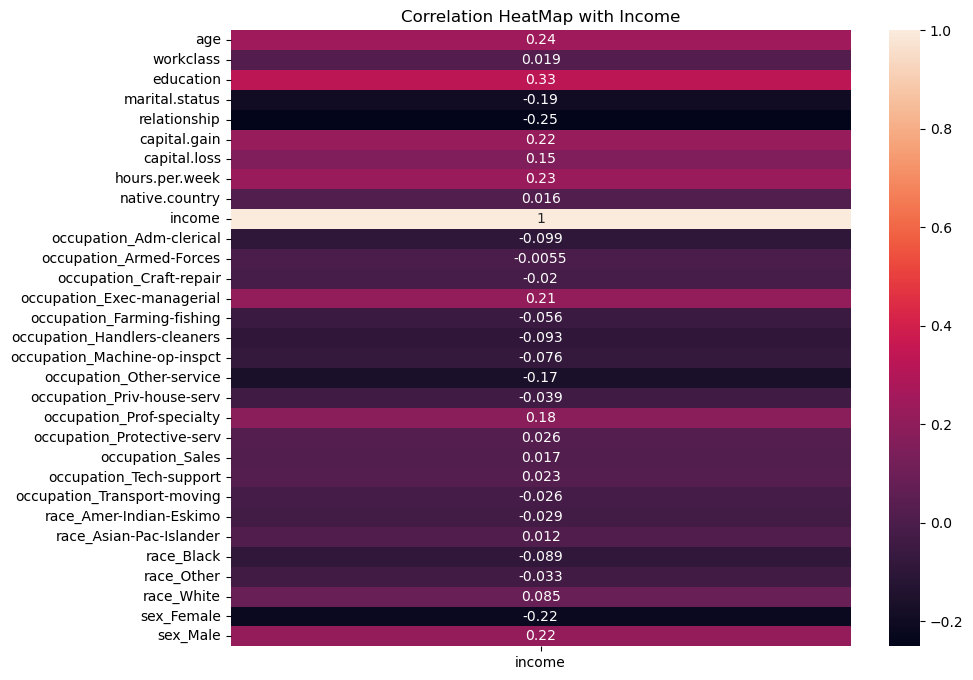

In [87]:
corr_matrix = df_new.corr()
income_corr = corr_matrix[['income']]
plt.figure(figsize=(10,8))
sns.heatmap(income_corr, annot=True)
plt.title("Correlation HeatMap with Income")
plt.show()

In [88]:
feature_columns = df_new.columns[df_new.columns != 'income']
target_column = 'income'

In [89]:
X = df_new[feature_columns]
y = df_new[target_column]

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [95]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
clf = RandomForestClassifier(random_state=42)

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [102]:
y_pred = clf.predict(X_test)

In [103]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.8504723639917472


In [104]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

Confusion Matrix
[[6388  579]
 [ 798 1444]]


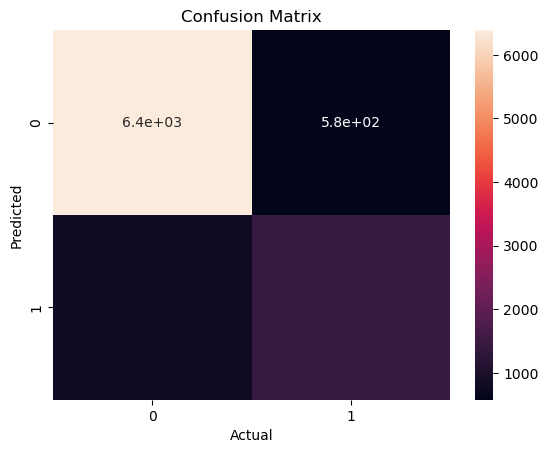

In [105]:
sns.heatmap(cm, annot=True).set(title='Confusion Matrix', xlabel='Actual', ylabel='Predicted')
plt.show()

In [106]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print("Classfication Report")
print(report)
# the model is slightly biased towards class 0

Classfication Report
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      6967
           1       0.71      0.64      0.68      2242

    accuracy                           0.85      9209
   macro avg       0.80      0.78      0.79      9209
weighted avg       0.85      0.85      0.85      9209



In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [109]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy Score: {accuracy}")
print("Classification Report:")
print(report)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy Score: 0.8281029427733738
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      6967
           1       0.71      0.50      0.58      2242

    accuracy                           0.83      9209
   macro avg       0.78      0.72      0.74      9209
weighted avg       0.82      0.83      0.82      9209

Confusion Matrix:
[[6515  452]
 [1131 1111]]


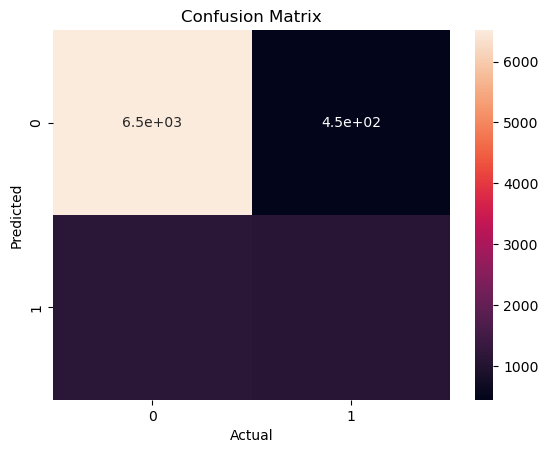

In [111]:
sns.heatmap(cm, annot=True).set(title='Confusion Matrix', xlabel='Actual', ylabel='Predicted')
plt.show()

In [118]:
y.value_counts()

income
0    23046
1     7648
Name: count, dtype: int64

In [121]:
from xgboost import XGBClassifier

In [123]:
xgb_clf = XGBClassifier(random_state=42, eval_metric='mlogloss', n_estimators=100)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [126]:
y_pred = xgb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy Score: {accuracy}")
print("Classification Report:")
print(report)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy Score: 0.8733847323270714
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6967
           1       0.78      0.67      0.72      2242

    accuracy                           0.87      9209
   macro avg       0.84      0.80      0.82      9209
weighted avg       0.87      0.87      0.87      9209

Confusion Matrix:
[[6545  422]
 [ 744 1498]]


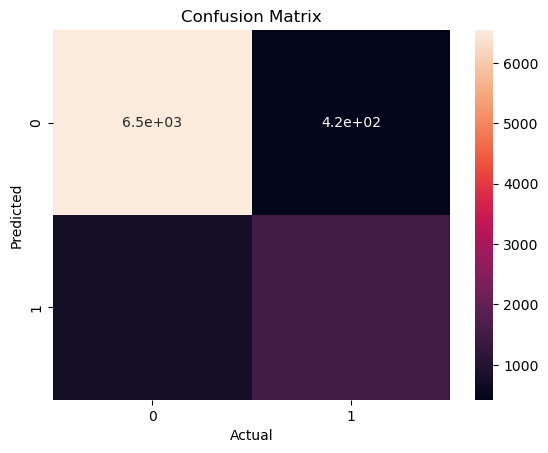

In [127]:
sns.heatmap(cm, annot=True).set(title='Confusion Matrix', xlabel='Actual', ylabel='Predicted')
plt.show()

In [130]:
# defining the final model
xgb_clf_final = XGBClassifier(random_state=42, eval_metric='mlogloss', n_estimators=100)
xgb_clf_final.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [132]:
import joblib

model_path = 'xgb_model.pkl'

joblib.dump(xgb_clf, model_path)

print(f"Model saved to {model_path}")

Model saved to xgb_model.pkl
